# Federal Reserve Economic Data (FRED) FX Analysis Project

I wanted to do some exploratory analysis of foreign exchange rate time series data.

I looked at the [Federal Reserve Economic Data (FRED) website](https://fred.stlouisfed.org).

I accessed this through pandas in Python using the data reader package, which loads the data into a data frame.

I had to invert some data because some exchange rates were US dollars to other currencies, while other exchange rates were other currencies to US dollars, so I had to make them all the same by taking reciprocals as I wanted all exchange rates expressed as other currencies to US dollars. I removed the missing data using the pandas dropna function.

Data Science FX project : Daniel Barclay 2019


Then I looked at correlations between each of the different FX rates.

I looked at 6 currencies, looking at 1000 data points for each between 2007 – 2011, then I plotted all the currencies over time using Matplotlib.

<u>Graph:</u>

I plotted FX rate value to USD against date.

At this point I decided to expand the data from 2007 – 2019, and the program made the change automatically. I could also easily add other currencies.

\*Because Japanese Yen has a higher exchange rate  (approximately x100), it makes fluctuations in the currencies with smaller exchange rates very hard to see if you don’t normalise it.

The bottom range of the diagram shows how much fluctuation there is in a specific time region for each currency against USD. I used a different colour for each currency.

I then made 2 modifications:

1)     To show log returns, which is a ratio of 2 consecutive samples.

I found log (today/previous day), or log (today)- log(previous day)

Taking logs turns it into a proportional scaling, in which 0=unchanged, 0.1 = 10% increase, 0.2= 20% increase etc. Logs are the commonly used convention.

I computed a correlation matrix based on the returns which shows how the currencies behave relative to each other. A positive value indicates tracking (+1 = perfectly correlated, 0= no correlation, and a negative value = going in the other direction).

The log return diagrams show the rate of change of each currency day on day.

Each analysis gives further insight about the data. For instance, the swiss franc showed an opposite trend to most of the currencies.

Next I created a scatter matrix

The scatter matrix has pair plots of one currency against another in a square grid. The diagonal plots however show the histogram or probability density of a single exchange rate. It estimates the rate of occurrence of each value.

An anomaly appears to be the Danish Kroner as it appears to be almost perfectly correlated with the euro (appearing as a straight diagonal line in the pair plot).

Then I showed a heatmap plot of correlations which essentially show how each exchange rate is correlated. We can see that the euro-USD exchange rate is fairly strongly correlated with the GBP-USD (deep orange).

This is useful for investors to diversify and spread risk. Investors should choose exchange rates that are poorly correlated or anti-correlated (blue in this diagram).

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas_datareader.data as web
import pandas as pd
import datetime as dt
start = dt.datetime(2007,1,1)
end = dt.datetime(2019,12,27)
fx_symbols = ["DEXUSUK", "DEXUSEU", "DEXJPUS", "DEXCAUS", "DEXDNUS", "DEXNOUS","DEXSZUS","DEXSDUS","DEXCHUS"]
FX = web.DataReader(fx_symbols, 'fred', start,end)

In [4]:
fred2iso = {'US':'USD', 'UK':'GBP', 'EU':'EUR', 'JP':'JPY', 'CA':'CAD', 'DN':'DKK', 'NO':'NOK', 'SZ':'CHF', 'SD':'SEK', 'CH':'CNY'}

In [5]:
fred2iso['UK']

'GBP'

In [6]:
cols = [fred2iso[c[3:5]] + "-" + fred2iso[c[5:]] for c in FX.columns]

In [7]:
FX.columns = cols
FX.columns

Index(['USD-GBP', 'USD-EUR', 'JPY-USD', 'CAD-USD', 'DKK-USD', 'NOK-USD',
       'CHF-USD', 'SEK-USD', 'CNY-USD'],
      dtype='object')

In [8]:
FX['GBP-USD'] = 1/FX['USD-GBP']
FX['EUR-USD'] = 1/FX['USD-EUR']

In [9]:
FX.drop(['USD-EUR','USD-GBP'], axis=1, inplace = True)
FX.dropna(inplace = True)

In [10]:
FX

,JPY-USD,CAD-USD,DKK-USD,NOK-USD,CHF-USD,SEK-USD,CNY-USD,GBP-USD,EUR-USD
DATE,,,,,,,,,
2007-01-02,118.83,1.1647,5.6119,6.1809,1.2125,6.7818,7.8051,0.506688,0.752672
2007-01-03,119.58,1.1699,5.6589,6.2598,1.2263,6.8539,7.8051,0.512873,0.759359
2007-01-04,119.28,1.1766,5.6913,6.3229,1.2314,6.9335,7.8090,0.514324,0.763709
2007-01-05,118.77,1.1753,5.7302,6.3513,1.2366,6.9744,7.8047,0.518001,0.768935
2007-01-08,118.49,1.1777,5.7207,6.3592,1.2357,6.9972,7.8127,0.515863,0.767872
2007-01-09,119.45,1.1782,5.7359,6.3536,1.2417,7.0232,7.8055,0.515464,0.769527
2007-01-10,119.52,1.1770,5.7581,6.4363,1.2459,7.0542,7.8075,0.517224,0.772798
2007-01-11,120.49,1.1761,5.7756,6.4728,1.2482,7.0829,7.7945,0.514430,0.774954
2007-01-12,120.36,1.1706,5.7663,6.4623,1.2485,7.0330,7.7984,0.510803,0.773635


In [11]:
FX.corr()

,JPY-USD,CAD-USD,DKK-USD,NOK-USD,CHF-USD,SEK-USD,CNY-USD,GBP-USD,EUR-USD
JPY-USD,1.000000,0.651989,0.498171,0.581213,0.340160,0.496925,0.299085,0.129875,0.495529
CAD-USD,0.651989,1.000000,0.854329,0.960027,0.077388,0.926988,0.092608,0.739299,0.853223
DKK-USD,0.498171,0.854329,1.000000,0.930578,-0.122624,0.880421,-0.109392,0.799785,0.999909
NOK-USD,0.581213,0.960027,0.930578,1.000000,-0.050433,0.954902,0.007318,0.825402,0.929578
CHF-USD,0.340160,0.077388,-0.122624,-0.050433,1.000000,0.076344,0.818523,-0.291254,-0.121127
SEK-USD,0.496925,0.926988,0.880421,0.954902,0.076344,1.000000,0.110171,0.836443,0.879742
CNY-USD,0.299085,0.092608,-0.109392,0.007318,0.818523,0.110171,1.000000,-0.196273,-0.108476
GBP-USD,0.129875,0.739299,0.799785,0.825402,-0.291254,0.836443,-0.196273,1.000000,0.800864
EUR-USD,0.495529,0.853223,0.999909,0.929578,-0.121127,0.879742,-0.108476,0.800864,1.000000


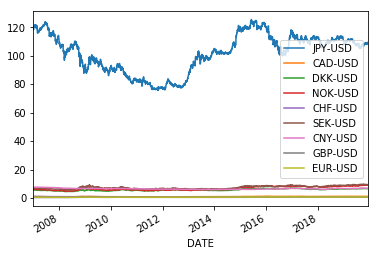

In [12]:
FX.plot()

In [13]:
from numpy import log

In [14]:
FX_returns = log(FX/FX.shift(1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025720BF6F28>,
      dtype=object)

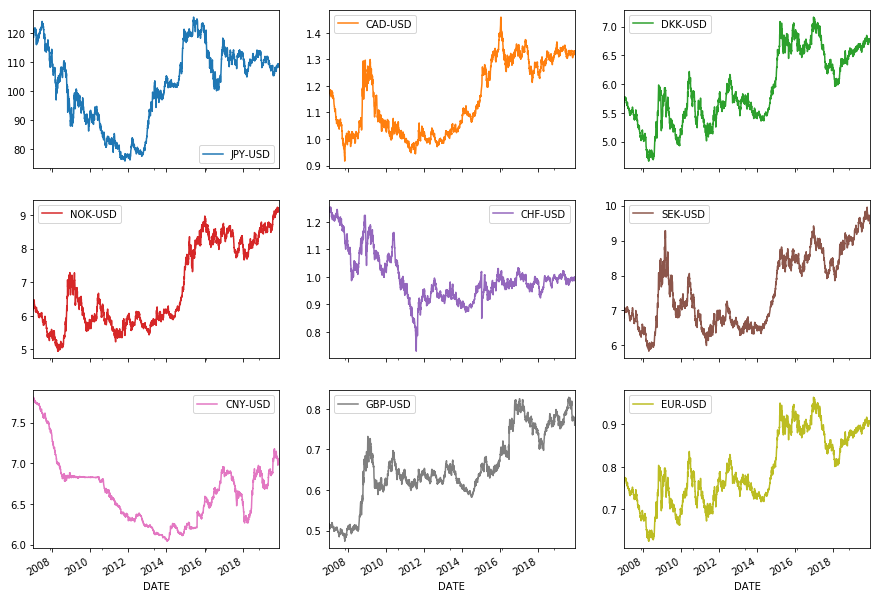

In [15]:
FX.plot(subplots=True,figsize=(15,11),layout=(3, 3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000257212FC0F0>,
      dtype=object)

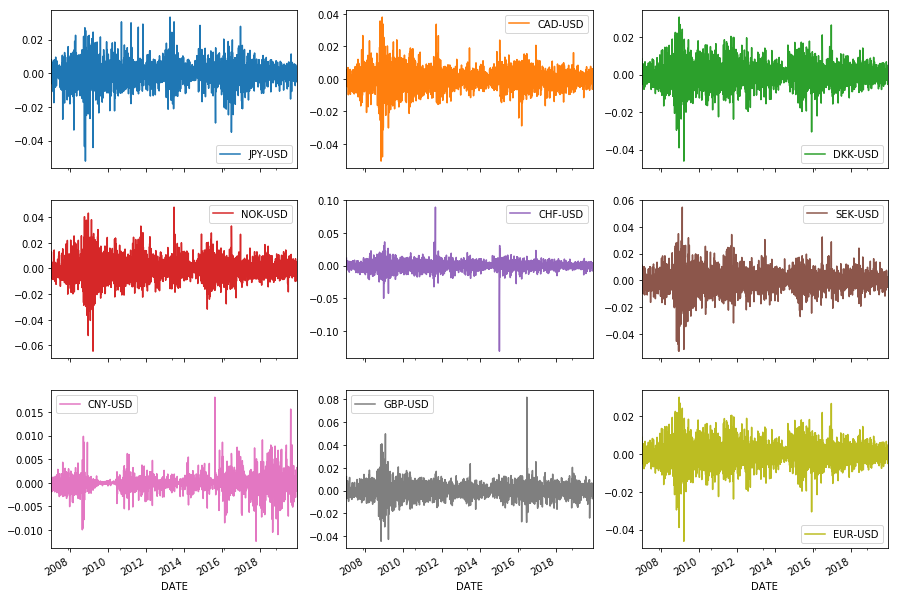

In [16]:
# Now we get the log-returns (one-day)
FX_returns.plot(subplots=True,figsize=(15,11),layout=(3, 3))

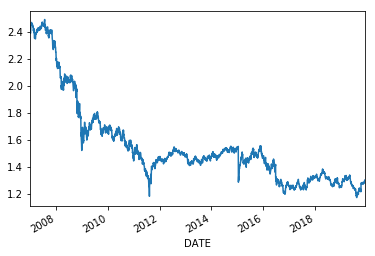

In [17]:
Ferdinand_the_data_frame = FX['CHF-USD']/FX['GBP-USD']
Ferdinand_the_data_frame.plot()

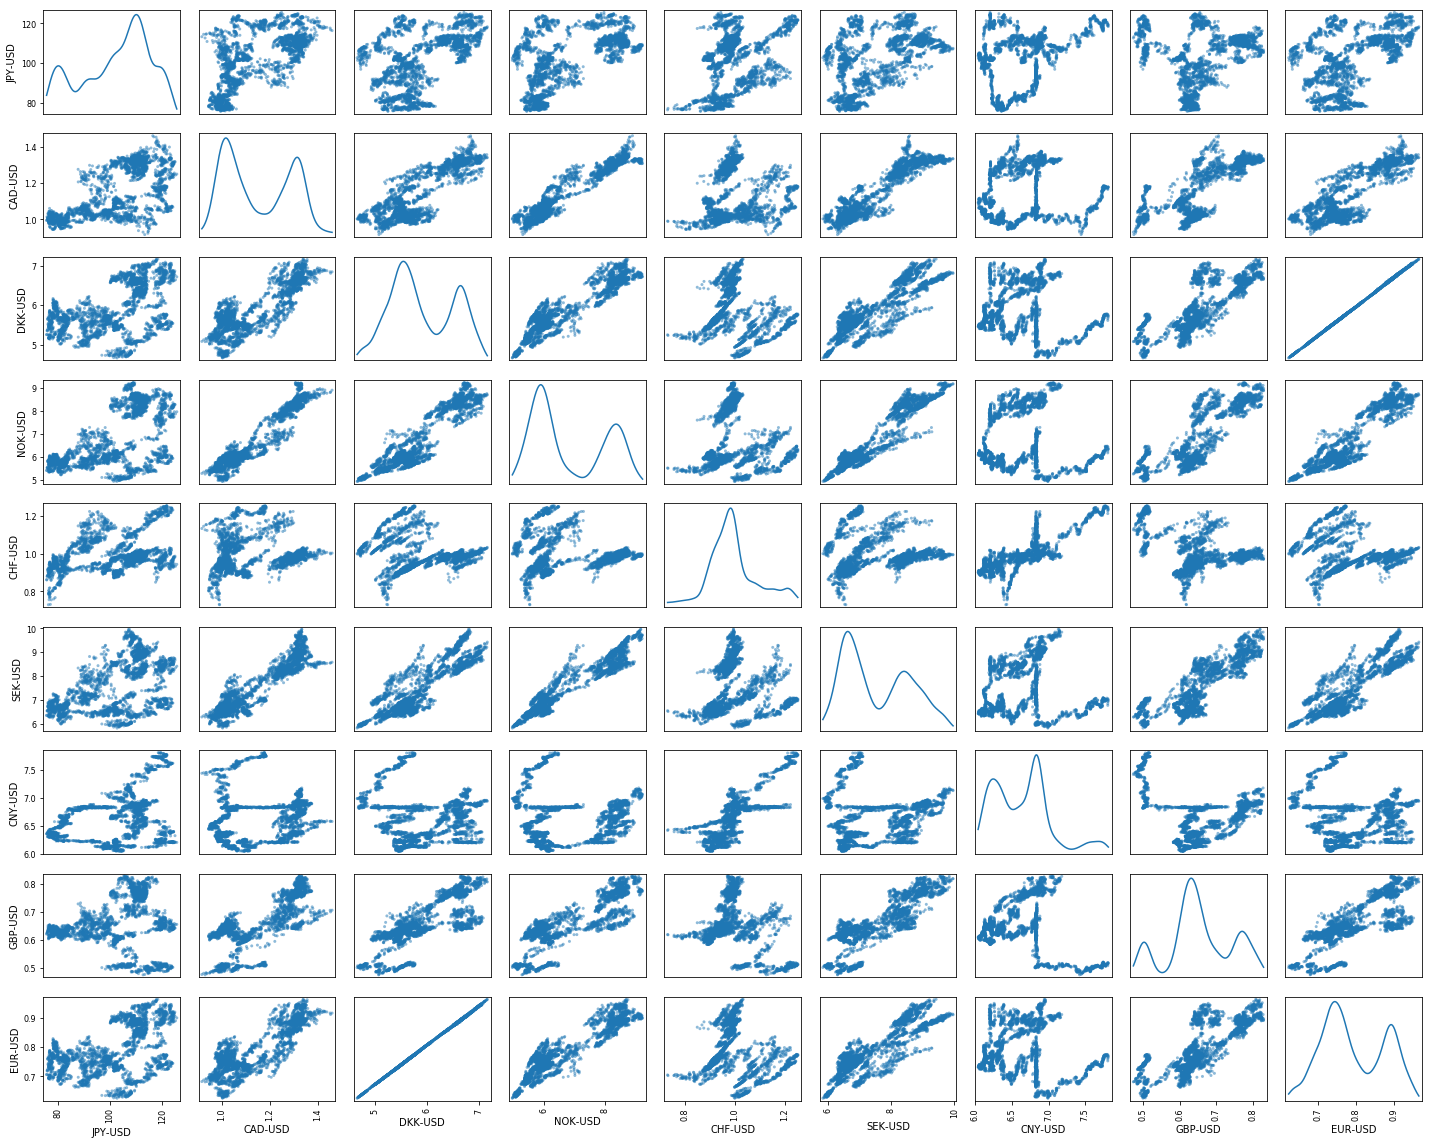

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(FX.loc[:,"JPY-USD":"EUR-USD"], diagonal = "kde",figsize = (20,16))
plt.tight_layout()
plt.show()

In [19]:
import seaborn as sns

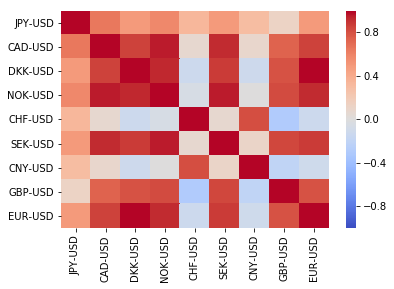

In [20]:
sns.heatmap(FX.corr(),cmap='coolwarm',vmin=-1,vmax=1)

In [24]:
x=FX.corr()

In [25]:
x.values

array([[ 1.        ,  0.65198869,  0.49817111,  0.58121337,  0.34016026,
         0.49692544,  0.29908546,  0.12987466,  0.49552891],
       [ 0.65198869,  1.        ,  0.85432932,  0.96002724,  0.07738809,
         0.92698774,  0.09260803,  0.73929904,  0.85322345],
       [ 0.49817111,  0.85432932,  1.        ,  0.93057814, -0.12262395,
         0.88042068, -0.1093922 ,  0.79978483,  0.99990914],
       [ 0.58121337,  0.96002724,  0.93057814,  1.        , -0.05043287,
         0.9549022 ,  0.00731818,  0.82540152,  0.92957828],
       [ 0.34016026,  0.07738809, -0.12262395, -0.05043287,  1.        ,
         0.07634412,  0.81852309, -0.2912537 , -0.12112707],
       [ 0.49692544,  0.92698774,  0.88042068,  0.9549022 ,  0.07634412,
         1.        ,  0.11017089,  0.83644312,  0.87974178],
       [ 0.29908546,  0.09260803, -0.1093922 ,  0.00731818,  0.81852309,
         0.11017089,  1.        , -0.19627337, -0.10847553],
       [ 0.12987466,  0.73929904,  0.79978483,  0.82540152, -0

In [26]:
print(np.linalg.eig(x)[0])

[5.69517077e+00 2.13165944e+00 6.53931237e-01 2.19529092e-01
 1.70750925e-01 7.45754413e-02 4.12505921e-02 1.30609959e-02
 7.14992079e-05]
